In [1]:
import pandas as pd 
from ydata_profiling import ProfileReport
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("default")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

1. Read The Data and get informations and statistics

In [2]:
df = pd.read_csv("/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv")
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Remove unnecesary column.
df.drop(['id','df_index','description','imdb_id'],axis=1,inplace=True)

#display the top rows
df.head()

title   type  release_year age_certification  \
0                      Taxi Driver  MOVIE          1976                 R   
1  Monty Python and the Holy Grail  MOVIE          1975                PG   
2                    Life of Brian  MOVIE          1979                 R   
3                     The Exorcist  MOVIE          1973                 R   
4     Monty Python's Flying Circus   SHOW          1969             TV-14   

   runtime  imdb_score  imdb_votes  
0      113         8.3    795222.0  
1       91         8.2    530877.0  
2       94         8.0    392419.0  
3      133         8.1    391942.0  
4       30         8.8     72895.0

2. Plot how many Movies and TV Shows released every decades

In [4]:
df['decade'] = df['release_year'] //  10 * 10
num_items_decades = df.groupby(['decade', 'type']).agg({'title': 'count'}).reset_index()
num_items_decades = num_items_decades.sort_values(by=['decade', 'type', 'title'], ascending=[False, True, False]).reset_index(drop=True)
num_items_decades.rename(columns={'title': 'count'}, inplace=True)
num_items_decades

decade   type  count
0     2020  MOVIE    908
1     2020   SHOW    618
2     2010  MOVIE   2039
3     2010   SHOW   1133
4     2000  MOVIE    276
5     2000   SHOW     93
6     1990  MOVIE    105
7     1990   SHOW     21
8     1980  MOVIE     43
9     1980   SHOW      9
10    1970  MOVIE     20
11    1970   SHOW      1
12    1960  MOVIE     10
13    1960   SHOW      1
14    1950  MOVIE      6

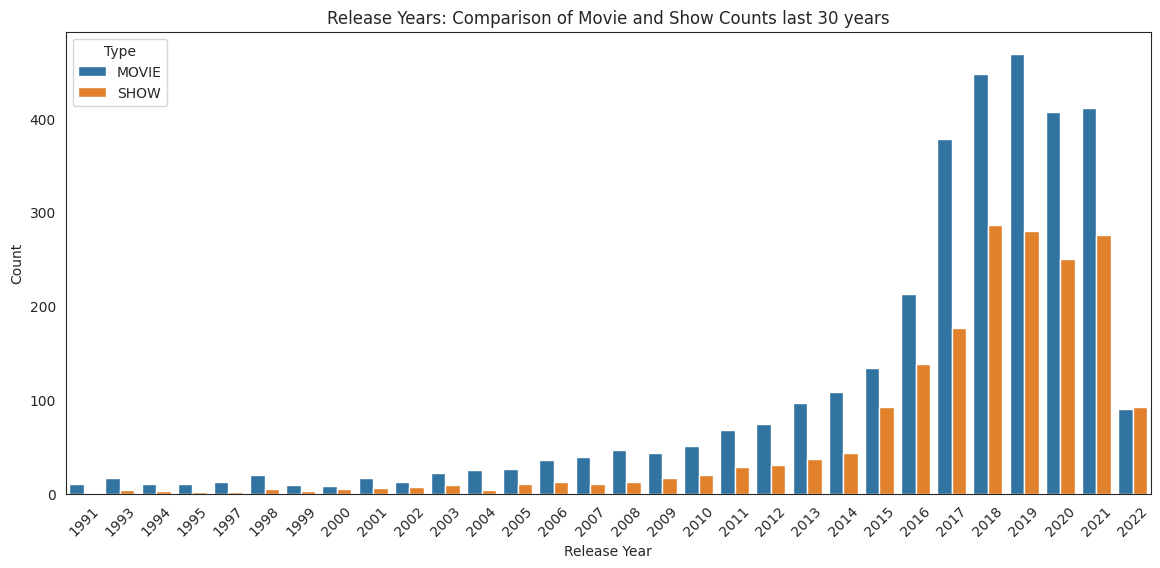

In [5]:
# Plotting with Seaborn countplot
year = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
top_n_years = year.assign(total=year.sum(axis=1)).nlargest(30, 'total').drop('total', axis=1)

sns.set_style("white")
plt.figure(figsize=(14, 6))
sns.countplot(data=df[df['release_year'].isin(top_n_years.index)], x='release_year', hue='type')

# Customize the plot
plt.title('Release Years: Comparison of Movie and Show Counts last 30 years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type', loc='upper left')
plt.xticks(rotation=45)

plt.show()

3. Plot how many Movies and TV Shows based on their IMDB score

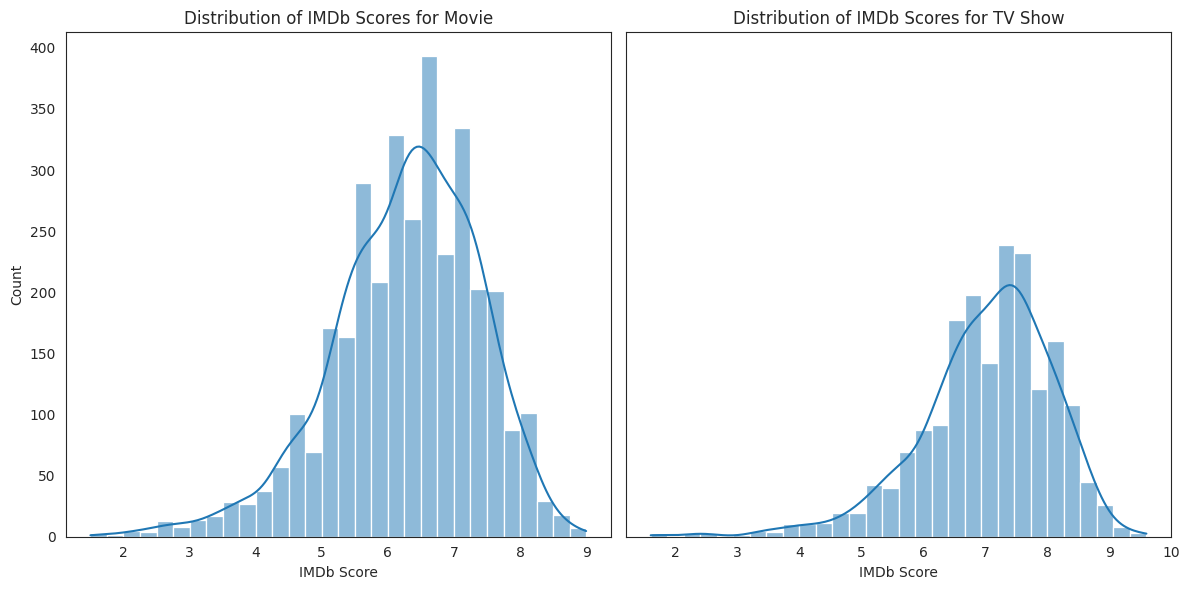

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.histplot(data=df[df['type'] == 'MOVIE'], x='imdb_score', bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of IMDb Scores for Movie')
axes[0].set_xlabel('IMDb Score')
axes[0].set_ylabel('Count')

sns.histplot(data=df[df['type'] == 'SHOW'], x='imdb_score', bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of IMDb Scores for TV Show')
axes[1].set_xlabel('IMDb Score')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

4. Plot the average IMDB Score of each Movies and Shows based on the release year

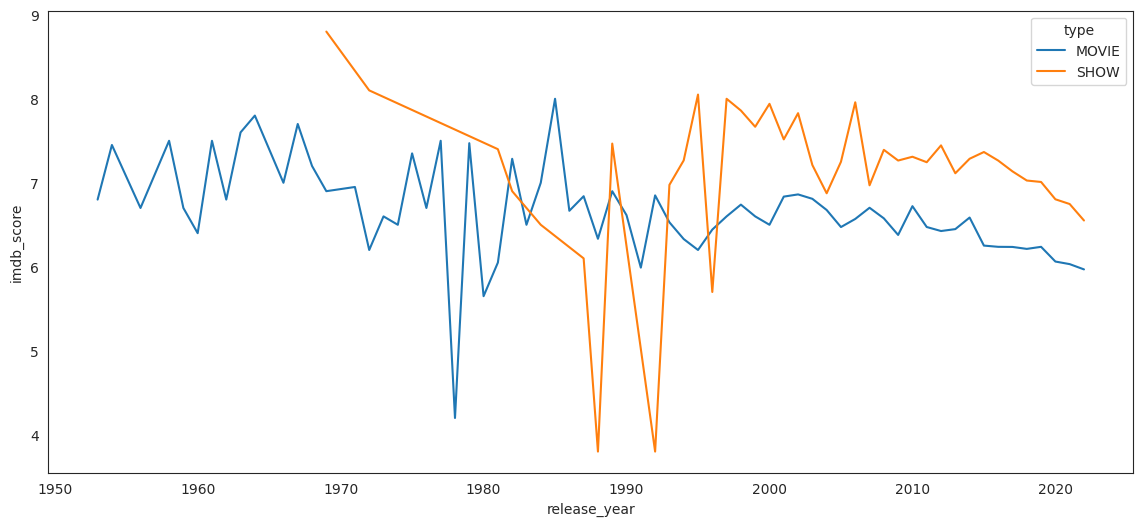

release_year   type  imdb_score
0            1953  MOVIE    6.800000
1            1954  MOVIE    7.450000
2            1956  MOVIE    6.700000
3            1958  MOVIE    7.500000
4            1959  MOVIE    6.700000
..            ...    ...         ...
101          2020   SHOW    6.803600
102          2021  MOVIE    6.031630
103          2021   SHOW    6.747101
104          2022  MOVIE    5.968889
105          2022   SHOW    6.551087

[106 rows x 3 columns]

In [7]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='release_year', y='imdb_score', hue='type', ci=None)

plt.show()

avg_score_year = df.groupby(['release_year', 'type'])['imdb_score'].mean().reset_index()
avg_score_year

5. Show the top 10 highest rated movies and tv shows based with most IMDB votes

In [8]:
df[df["type"]=="MOVIE"].sort_values(by=["imdb_votes", "imdb_score"], ascending=[False,False])[:10]

title   type  release_year age_certification  runtime  \
246                 Inception  MOVIE          2010             PG-13      148   
101              Forrest Gump  MOVIE          1994             PG-13      142   
662          Django Unchained  MOVIE          2012                 R      165   
104       Saving Private Ryan  MOVIE          1998                 R      169   
0                 Taxi Driver  MOVIE          1976                 R      113   
870        The Imitation Game  MOVIE          2014             PG-13      113   
48          Full Metal Jacket  MOVIE          1987                 R      116   
248  How to Train Your Dragon  MOVIE          2010                PG       98   
683   Silver Linings Playbook  MOVIE          2012                 R      122   
262        The Social Network  MOVIE          2010             PG-13      121   

     imdb_score  imdb_votes  decade  
246         8.8   2268288.0    2010  
101         8.8   1994599.0    1990  
662         8.4   1472668.0    2010  
104         8.6   1346020.0    1990  
0           8.3    795222.0    1970  
870         8.0    748654.0    2010  
48          8.3    723306.0    1980  
248         8.1    719717.0    2010  
683         7.7    697481.0    2010  
262         7.8    681286.0    2010

In [9]:
df[df["type"]=="SHOW"].sort_values(by=["imdb_votes", "imdb_score"], ascending=[False,False])[:10]

title  type  release_year age_certification  runtime  \
229       Breaking Bad  SHOW          2008             TV-MA       48   
1145   Stranger Things  SHOW          2016             TV-14       52   
230   The Walking Dead  SHOW          2010             TV-MA       46   
660       Black Mirror  SHOW          2011             TV-MA       59   
883     House of Cards  SHOW          2013             TV-MA       52   
859     Peaky Blinders  SHOW          2013             TV-MA       58   
3016       The Witcher  SHOW          2019             TV-MA       58   
1740       Money Heist  SHOW          2017             TV-MA       50   
239       Supernatural  SHOW          2005             TV-14       45   
675              Arrow  SHOW          2012             TV-14       42   

      imdb_score  imdb_votes  decade  
229          9.5   1727694.0    2000  
1145         8.7    989090.0    2010  
230          8.2    945125.0    2010  
660          8.8    515577.0    2010  
883          8.7    494092.0    2010  
859          8.8    485506.0    2010  
3016         8.2    465949.0    2010  
1740         8.3    450797.0    2010  
239          8.5    428639.0    2000  
675          7.5    425716.0    2010

Show the correlation between IMDB Score and IMDB Votes for each movies and shows

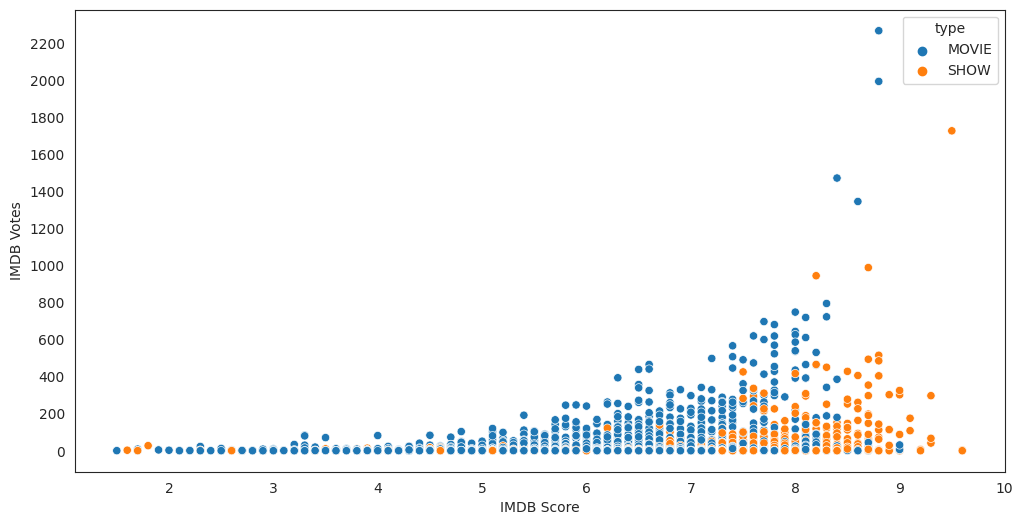

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='imdb_score', y=df['imdb_votes']/1000, hue='type')
plt.yticks(range(0, int((df['imdb_votes']/1000).max()) + 1, 200))
plt.xlabel('IMDB Score')
plt.ylabel('IMDB Votes')
plt.show()

6. Plot How many movies and tv shows based on their age certification

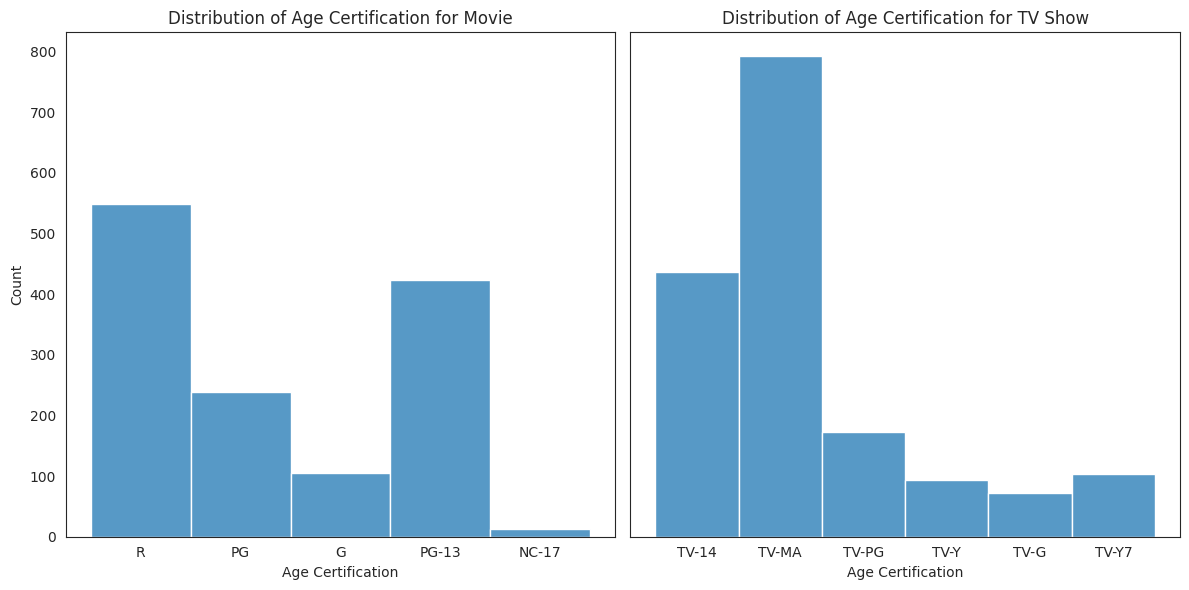

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.histplot(data=df[df['type'] == 'MOVIE'], x='age_certification', bins=5, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Age Certification for Movie')
axes[0].set_xlabel('Age Certification')
axes[0].set_ylabel('Count')

sns.histplot(data=df[df['type'] == 'SHOW'], x='age_certification', bins=5, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Age Certification for TV Show')
axes[1].set_xlabel('Age Certification')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

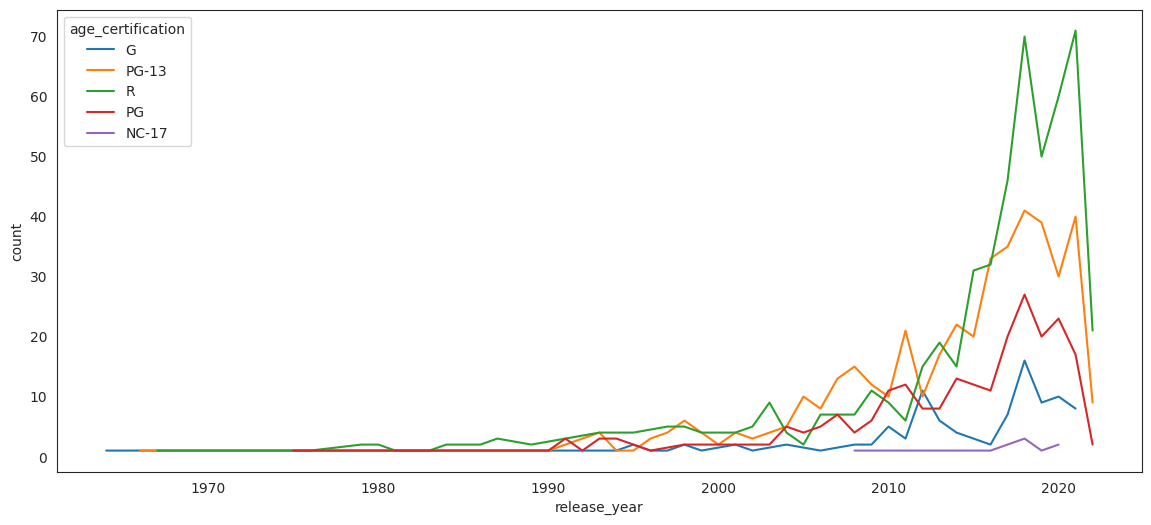

In [12]:
plt.figure(figsize=(14,6))
counts = df[df['type'] == 'MOVIE'].groupby(['release_year', 'age_certification']).size().reset_index(name='count')
sns.lineplot(data=counts, x='release_year', y='count', hue='age_certification')
plt.show()

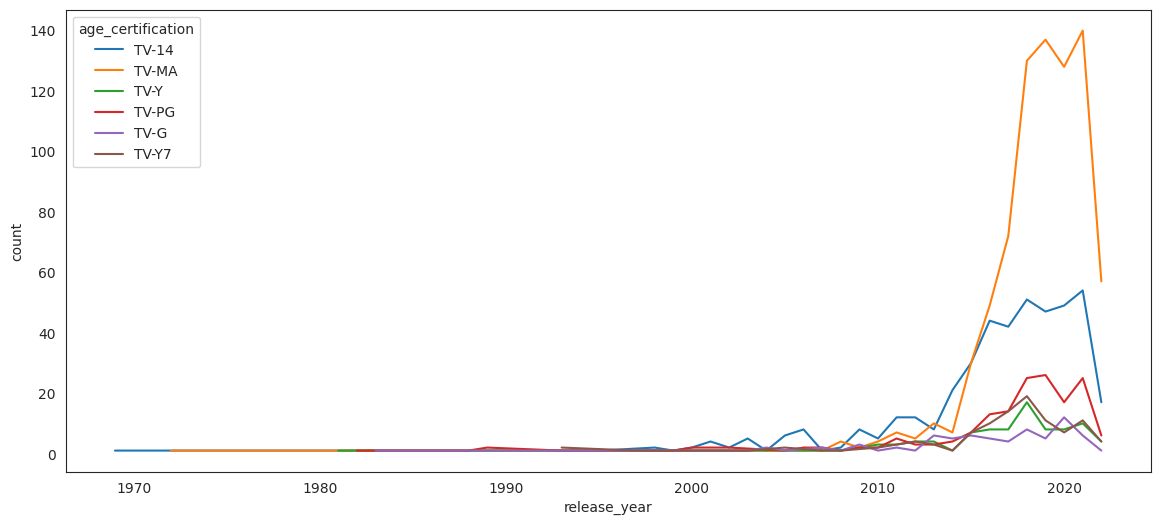

In [13]:
plt.figure(figsize=(14,6))
counts = df[df['type'] == 'SHOW'].groupby(['release_year', 'age_certification']).size().reset_index(name='count')
sns.lineplot(data=counts, x='release_year', y='count', hue='age_certification')
plt.show()

6. Show the correlation between Age Certification and IMDB Score, Age Certification and runtime

In [14]:
average_runtimes = df.groupby(['age_certification', 'type']).agg({'runtime': 'mean', 'imdb_score': 'mean', 'imdb_votes': 'sum', 'title': 'count'}).reset_index()
average_runtimes = average_runtimes.sort_values(by=['runtime', 'imdb_score'], ascending=[False, False]).reset_index(drop=True)

avg_movie_score = average_runtimes[average_runtimes['type'] == 'MOVIE']['imdb_score'].idxmax()
avg_tv_score = average_runtimes[average_runtimes['type'] == 'SHOW']['imdb_score'].idxmax()
max_movie_row = average_runtimes.loc[avg_movie_score]
max_tv_row = average_runtimes.loc[avg_tv_score]

movie_count = average_runtimes[average_runtimes['type'] == 'MOVIE']['title'].idxmax()
tv_count = average_runtimes[average_runtimes['type'] == 'SHOW']['title'].idxmax()
max_movie_count = average_runtimes.loc[movie_count]
max_tv_count = average_runtimes.loc[tv_count]

movie_runtimes = average_runtimes[average_runtimes['type'] == 'MOVIE']['runtime'].idxmax()
tv_runtimes = average_runtimes[average_runtimes['type'] == 'SHOW']['runtime'].idxmax()
max_movie_runtimes = average_runtimes.loc[movie_runtimes]
max_tv_runtimes = average_runtimes.loc[tv_runtimes]

movie_votes = average_runtimes[average_runtimes['type'] == 'MOVIE']['imdb_votes'].idxmax()
tv_votes = average_runtimes[average_runtimes['type'] == 'SHOW']['imdb_votes'].idxmax()
max_movie_votes = average_runtimes.loc[movie_votes]
max_tv_votes = average_runtimes.loc[tv_votes]

print(f"The highest average score of age certification for Movies is {max_movie_row['age_certification']} with the score of {max_movie_row['imdb_score']}, and for TV Shows is {max_tv_row['age_certification']} with the score of {max_tv_row['imdb_score']}")
print(f"The highest number of age certification for Movies is {max_movie_count['age_certification']} with {max_movie_count['title']} movies, and for TV Shows is {max_tv_count['age_certification']} with {max_tv_count['title']} TV Shows ")
print(f"The highest average runtimes of age certification for Movies is {max_movie_runtimes['age_certification']} with {max_movie_runtimes['runtime']} minutes, and for TV Shows is {max_tv_runtimes['age_certification']} with {max_tv_runtimes['runtime']} minutes ")
print(f"The highest voted age certification for Movies is {max_movie_votes['age_certification']} with {max_movie_votes['imdb_votes']} votes, and for TV Shows is {max_tv_votes['age_certification']} with {max_tv_votes['imdb_votes']} votes ")

average_runtimes.rename(columns={'title': 'count'}, inplace=True)
average_runtimes


The highest average score of age certification for Movies is PG-13 with the score of 6.444575471698113, and for TV Shows is TV-14 with the score of 7.262614678899083
The highest number of age certification for Movies is R with 548 movies, and for TV Shows is TV-MA with 792 TV Shows 
The highest average runtimes of age certification for Movies is PG-13 with 108.97405660377359 minutes, and for TV Shows is TV-MA with 43.52020202020202 minutes 
The highest voted age certification for Movies is R with 42344416.0 votes, and for TV Shows is TV-MA with 19179596.0 votes 


age_certification   type     runtime  imdb_score  imdb_votes  count
0              PG-13  MOVIE  108.974057    6.444575  27889552.0    424
1                  R  MOVIE  106.136861    6.321168  42344416.0    548
2                 PG  MOVIE  106.016807    6.208403   8512142.0    238
3              NC-17  MOVIE  100.230769    6.400000    209965.0     13
4                  G  MOVIE   99.390476    6.393333    808385.0    105
5              TV-MA   SHOW   43.520202    7.065909  19179596.0    792
6              TV-14   SHOW   41.176606    7.262615  10466379.0    436
7              TV-PG   SHOW   35.366279    6.916860   1752578.0    172
8               TV-G   SHOW   26.055556    6.348611    339340.0     72
9              TV-Y7   SHOW   22.182692    6.913462    731830.0    104
10              TV-Y   SHOW   16.648936    6.547872     67809.0     94

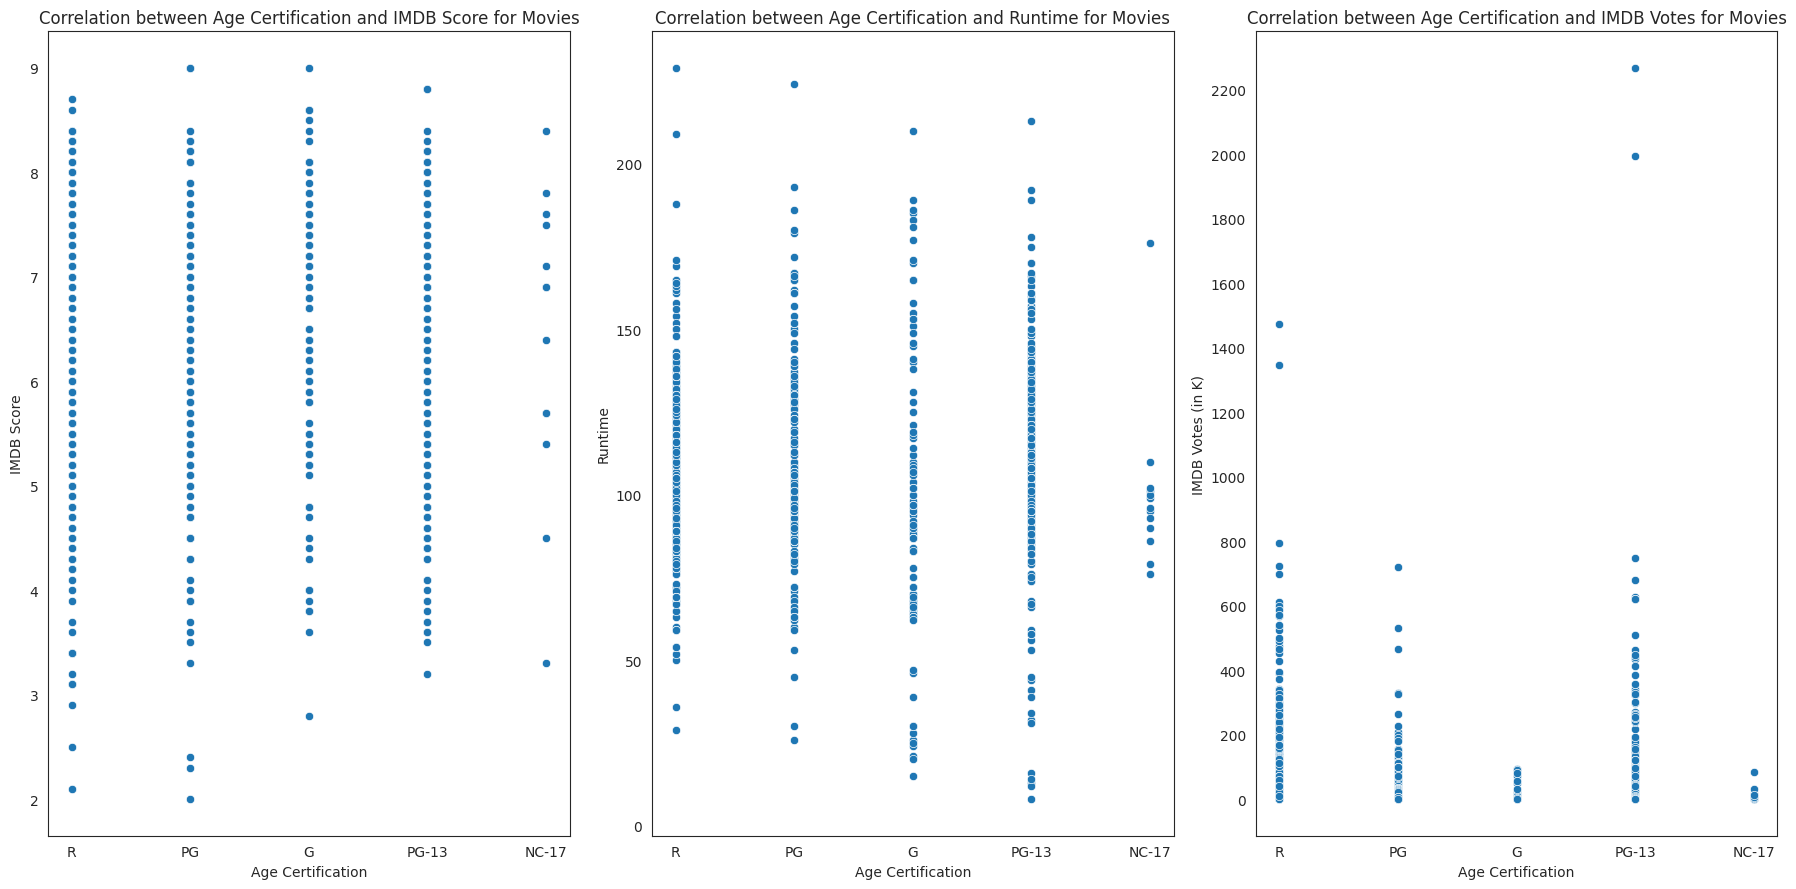

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 9), sharey=False)
sns.scatterplot(data=df[df['type'] == 'MOVIE'], x='age_certification',y='imdb_score', ax=axes[0])
axes[0].set_title('Correlation between Age Certification and IMDB Score for Movies')
axes[0].set_xlabel('Age Certification')
axes[0].set_ylabel('IMDB Score')

sns.scatterplot(data=df[df['type'] == 'MOVIE'], x='age_certification',y='runtime', ax=axes[1])
axes[1].set_title('Correlation between Age Certification and Runtime for Movies')
axes[1].set_xlabel('Age Certification')
axes[1].set_ylabel('Runtime')

sns.scatterplot(data=df[df['type'] == 'MOVIE'], x='age_certification',y=df['imdb_votes']/1000, ax=axes[2])
axes[2].set_title('Correlation between Age Certification and IMDB Votes for Movies')
axes[2].set_xlabel('Age Certification')
axes[2].set_ylabel('IMDB Votes (in K)')
axes[2].set_yticks(range(0, int((df['imdb_votes']/1000).max()) + 1, 200))

plt.tight_layout()
plt.show()

8. Average runtime every year for movies and TV shows

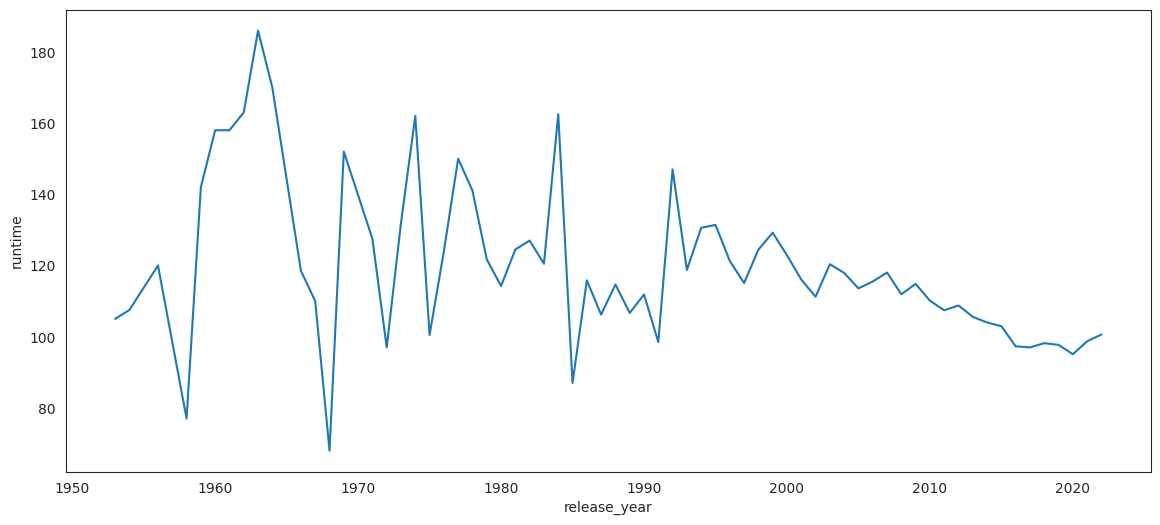

In [16]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df[df['type']=='MOVIE'], x='release_year', y='runtime' ,ci=None)
plt.show()

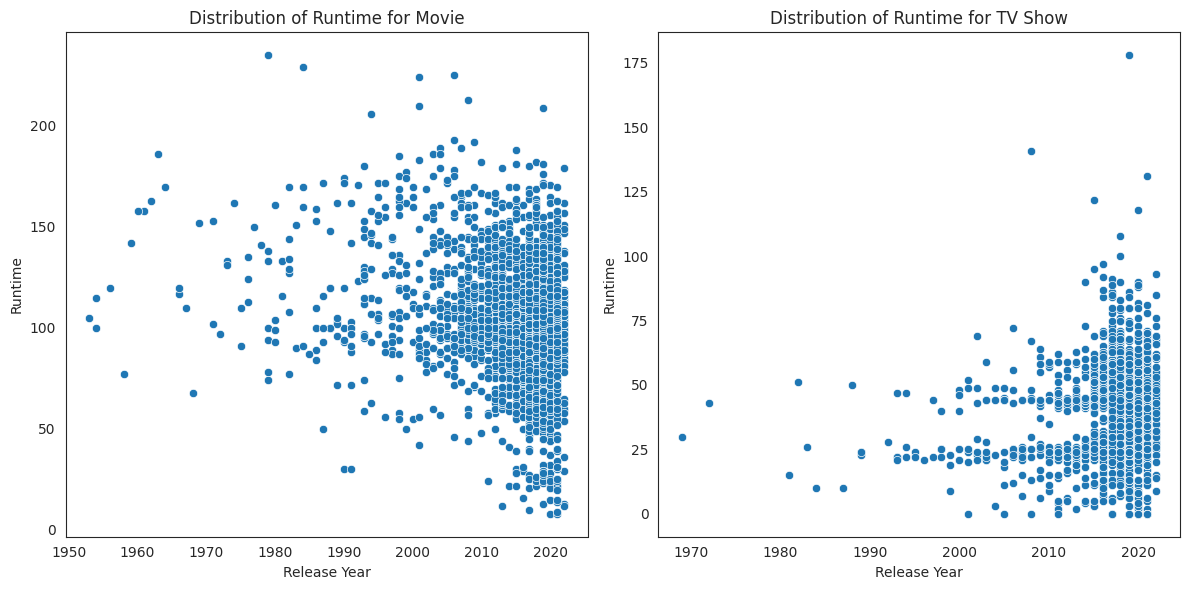

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
sns.scatterplot(data=df[df['type'] == 'MOVIE'], x='release_year',y='runtime', ax=axes[0])
axes[0].set_title('Distribution of Runtime for Movie')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Runtime')

sns.scatterplot(data=df[df['type'] == 'SHOW'], x='release_year',y='runtime', ax=axes[1])
axes[1].set_title('Distribution of Runtime for TV Show')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('Runtime')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
average_runtimes = df.groupby(['release_year', 'type'])['runtime'].mean().reset_index()
average_runtimes_movie = average_runtimes[average_runtimes['type'] == 'MOVIE']
average_runtimes_movie.sort_values(by=['release_year', 'runtime'], ascending=[False, False]).reset_index(drop=True)
 

release_year   type     runtime
0           2022  MOVIE  100.611111
1           2021  MOVIE   98.722628
2           2020  MOVIE   95.066339
3           2019  MOVIE   97.697228
4           2018  MOVIE   98.185682
..           ...    ...         ...
61          1959  MOVIE  142.000000
62          1958  MOVIE   77.000000
63          1956  MOVIE  120.000000
64          1954  MOVIE  107.500000
65          1953  MOVIE  105.000000

[66 rows x 3 columns]